# **Exploratory Data Analysis of Fitness Trackers available in the Indian Market**

This notebook uses a fitness tracker dataset. The data has been collected from an e-commerce website Flipkart using webscraping technique.

# Dataset details
This dataset contains 565 samples with 11 attributes. There are some missing values in this dataset.
Here are the columns in this dataset-

1.   **Brand Name**: This indicates the manufacturer of the product (fitness tracker)
2.   **Device Type**: This has two categories- FitnessBand and Smartwatch
3.  **Model Name**: This indicates the variant/Product Name
4.   **Color**: This includes the color of the Strap/Body of the fitness tracker
5.   **Selling Price**: This column has the Selling Price or the Discounted Price of the fitness tracker
6.   **Original Price**: This includes the Original Price of the product from the manufacturer.
7.   **Display**: This categorical variable shows the type of display for the fitness tracker. eg: AMOLED, LCD,OLED, etc.
8.   **Rating (Out of 5)**: Average customer ratings on a scale of 5.
9.   **Strap Material**: Details of the material used for the strap of the fitness tracker.
10.  **Average Battery Life (in days)**: Quoted average battery life from the manufacturer based on the individual product pages. (It is not the scraped data)
11.  **Reviews**:  count of product reviews received.



## This EDA will answer some interesting questions like-
1. Demand for fitness trackers
2. Number of Players in the market
3. Which are the top 5 brands for fitness bands and smart watches?
4. Which brand has the highest number of products?
5. Are fitness trackers with higher ratings more expensive?
6. Do expensive fitness trackers have a better battery performance?
7. Are mid-priced trackers mostly available at discounted prices?
8. Most commonly available color for trackers
9. Most commonly available strap material for trackers
10. Average Selling Price by Brand

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df=pd.read_csv('/content/Fitness_trackers.csv',thousands=',')
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


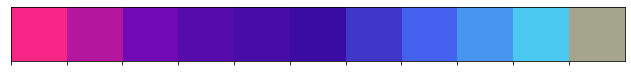

In [3]:
#color palette for this notebook
colors = ["#F72585","#B5179E","#7209B7","#560BAD","#480CA8","#3A0CA3",\
"#3F37C9","#4361EE","#4895EF","#4CC9F0","#a5a58d"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

# EDA

In [4]:
df.shape

(565, 11)

In [5]:
#check for data types
df.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                       int64
Original Price                      int64
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
Reviews                           float64
dtype: object

In [6]:
#distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling Price,565.0,22110.373451,19914.926066,1195.0,8990.000,15995.0,29900.00,122090.0
Original Price,565.0,25365.361062,20384.028759,1599.0,12999.000,19995.0,32900.00,122090.0
Rating (Out of 5),514.0,4.229961,0.390827,2.0,4.025,4.3,4.50,5.0
Average Battery Life (in days),565.0,9.026549,7.868670,1.0,2.000,7.0,14.00,45.0
Reviews,78.0,2492.948718,5607.529743,2.0,107.750,346.0,1580.75,23426.0


# Missing Values in Dataset

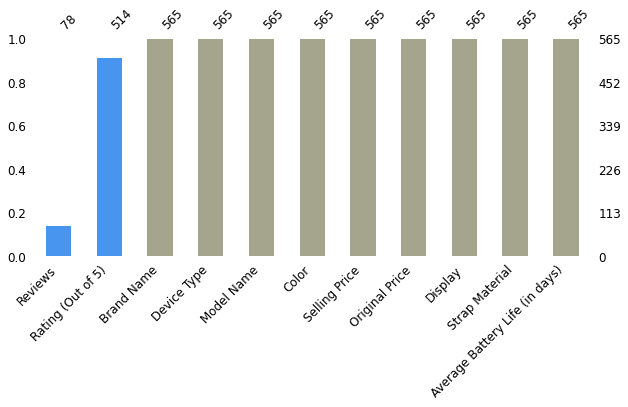

In [7]:
color=['#4895ef','#4895ef','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d']
msno.bar(df,figsize=(10,4), color=color,fontsize=12,sort="ascending")

# **Inference**:
There are missing values in two columns - Reviews and Rating (Out of 5)

# 1.Demand for fitness trackers

In [8]:
# count of products
df['Brand Name'].groupby(df['Device Type']).count().sort_values(ascending=False)

Device Type
Smartwatch     490
FitnessBand     75
Name: Brand Name, dtype: int64

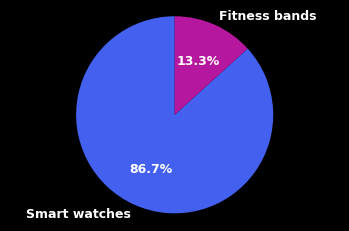

In [9]:
# Device Type distribution

labels = 'Smart watches', 'Fitness bands'
sizes = [490,75]
fig1, ax1 = plt.subplots()
fig1.set_facecolor('black')
ax1.pie(sizes, labels=labels, colors=["#4361EE",'#b5179e'],autopct='%1.1f%%', startangle=90,textprops={'color':'w','weight':'bold','fontsize':12.5})
ax1.axis('equal')
plt.show()

#2.Number of Players in the market


In [10]:
#count of brands
df['Brand Name'].nunique()

20

# **Inference**:
490 smartwatches and 75 fitnessbands from 20 different brands indicate that there is a good demand for Fitness Trackers in the current scenario

#3. Which are the top 5 brands for fitness bands and smart watches?

In [11]:
df['Brand Name'].groupby(df['Brand Name']).count().sort_values(ascending=False).iloc[:5]

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
Name: Brand Name, dtype: int64

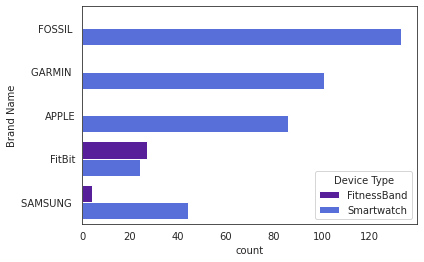

In [12]:
#product counts
sns.set_style('white')
sns.countplot(y="Brand Name", hue="Device Type", data=df, palette=["#560bad","#4361EE"],
              order=df["Brand Name"].value_counts().iloc[:5].index)

# **Inference:**
Fossil, Garmin, Apple, FitBit and Samsung are the top 5 brands offering most fitness trackers. Fossil, Garmin and Apple seem to offer only smart watches while FitBit and Samsung offer both fitness bands and smart watches.

# 4. Which brand has the highest number of products?


In [13]:
df['Device Type'].groupby(df['Brand Name']).count().sort_values(ascending=False).iloc[:1]

Brand Name
FOSSIL     133
Name: Device Type, dtype: int64

# **Inference**:
Fossil has the most number of products i.e. Smart watches

#5.Are fitness trackers with higher ratings more expensive?

In [14]:
#average ratings by Brand
round(df.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending=False).iloc[:10],1)

Brand Name
APPLE       4.5
OnePlus     4.3
FOSSIL      4.2
SAMSUNG     4.2
Honor       4.2
FitBit      4.2
Xiaomi      4.2
Huawei      4.2
huami       4.2
realme      4.1
Name: Rating (Out of 5), dtype: float64

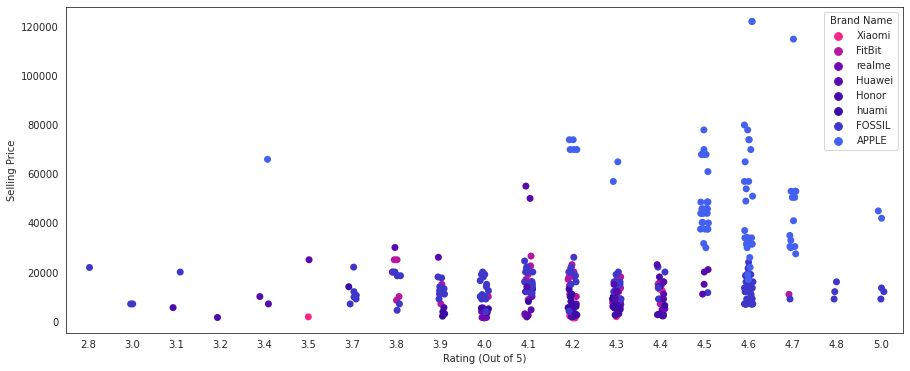

In [15]:
# Rating vs Selling Price
#filter by Brand
list = ["APPLE","OnePlus","FOSSIL ","SAMSUNG","Honor","FitBit","Xiaomi","Huawei","huami","realme"]
series = df["Brand Name"].isin(list)
df_f = df[series]
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="Rating (Out of 5)", y="Selling Price", data=df_f,hue="Brand Name", palette=colors,size=7, marker="o")

# **Inference**:

Expensive Brands seem to enjoy a higher rating.

#6.Do expensive fitness trackers have a better battery performance?

In [16]:
# Brandwise Mean Selling prices
round(df.groupby('Brand Name')['Average Battery Life (in days)'].mean(),0).sort_values(ascending=False)

Brand Name
GARMIN      17.0
huami       16.0
Oppo        14.0
Xiaomi      12.0
SAMSUNG     12.0
Honor       12.0
Huawei      11.0
realme      10.0
OnePlus      9.0
boAt         8.0
FitBit       7.0
GOQii        7.0
LAVA         7.0
Noise        7.0
LCARE        6.0
Fastrack     6.0
Noise        5.0
FOSSIL       5.0
Infinix      4.0
APPLE        1.0
Name: Average Battery Life (in days), dtype: float64

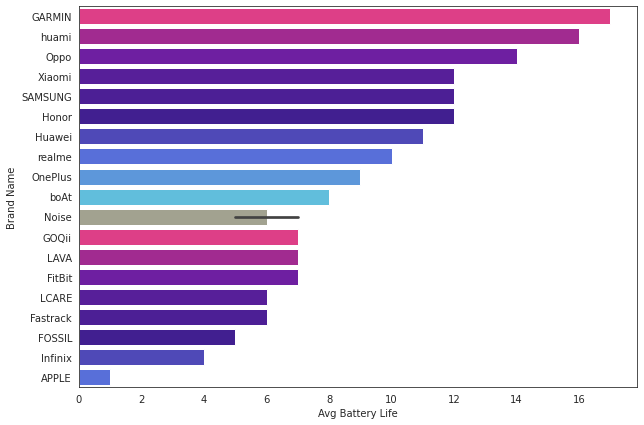

In [17]:
#average battery life
data={"Brand Name":["GARMIN","huami","Oppo","Xiaomi","SAMSUNG","Honor","Huawei","realme","OnePlus","boAt","Noise","GOQii","LAVA","FitBit","LCARE","Fastrack","FOSSIL","Noise","Infinix","APPLE"],
      "Avg Battery Life":[17.0,16.0,14.0,12.0,12.0,12.0,11.0,10.0,9.0,8.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,1.0]}
df_batt=pd.DataFrame(data)

sns.set_style('white')
plt.figure(figsize=(10,7))
ax=sns.barplot(x="Avg Battery Life", y="Brand Name",data=df_batt, palette= colors)

Garmin seems to provide the best battery life in days as an expensive brand. Samsung on the other hand gives around 12 days of battery life, a week lesser than Garmin. Most Apple products provide only a 1-2 days battery life. Similarly, Fossil even though expensive brand but offers a very low battery life of lesser than a week.

# **Inference**:
Both Garmin and Fossil brands are expensive but do not have comparable battery life. Hence, expensive does not always equal to better battery life for the fitness tracker. 


#7. Are mid-priced trackers mostly available at discounted prices?

In [18]:
#filter dataframe
df_p=df[(df["Selling Price"] <= 30000) & (df["Selling Price"] >= 10000)]
df_p.iloc[:2]

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
7,Xiaomi,Smartwatch,Revolve,Black,12349,15999,AMOLED Display,4.4,Silicone,14,2.0
8,Xiaomi,Smartwatch,RevolveActive,Black,12999,15999,AMOLED Display,4.4,Silicone,14,3.0


In [19]:
alt.Chart(df_p).mark_point(filled=True,size=40).encode(
    x='Original Price',
    y='Selling Price',
    color='Brand Name',
    tooltip=['Brand Name', 'Selling Price', 'Original Price']
).interactive()

alt.Chart(...)

# Inference:
It appears that since more products are available in the mid price segment, the discounted products are also more in the same segment  as well. Hence, it might be ok to infer that mid price segments are available mostly at discounted prices. (This is based on the situation when the data was scraped. Likely to change)

#8 Most commonly available color for trackers

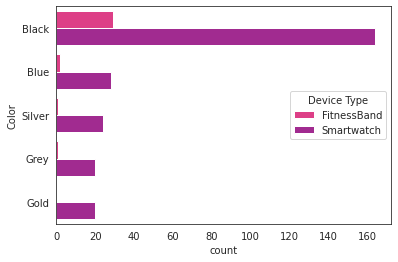

In [20]:
#Color counts
sns.countplot(y="Color", hue="Device Type", data=df, palette=colors,
              order=df["Color"].value_counts().iloc[:5].index)

# Inference:
Black seems to be the most offered color in both Smart watches and fitness bands

#9. Most commonly available strap material for trackers

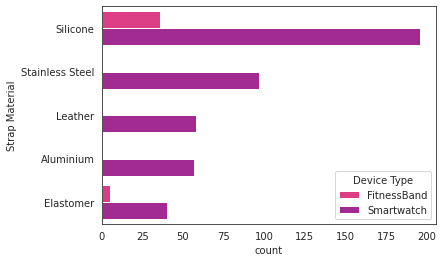

In [21]:
#Color counts
sns.countplot(y="Strap Material", hue="Device Type", data=df, palette=colors,
              order=df["Strap Material"].value_counts().iloc[:5].index)

# **Inference**:

Silicone and Elastomer seem to be the most common choices for Fitness Bands while Silicone, Stainless Steel, Leather and Aluminium seem to be the top choices for Smart Watches.

# 10. Average Selling Price by Brand and Most Expensive Brand

In [22]:
# Brandwise Mean Selling prices
df.groupby('Brand Name')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand Name
APPLE       49414.0
GARMIN      35039.0
SAMSUNG     22902.0
Oppo        16490.0
Huawei      15875.0
FitBit      14019.0
FOSSIL      13825.0
huami        7548.0
OnePlus      6933.0
Honor        5510.0
realme       4403.0
boAt         4247.0
Xiaomi       4101.0
Noise        3330.0
GOQii        3124.0
LCARE        2347.0
LAVA         1999.0
Noise        1949.0
Fastrack     1755.0
Infinix      1499.0
Name: Selling Price, dtype: float64

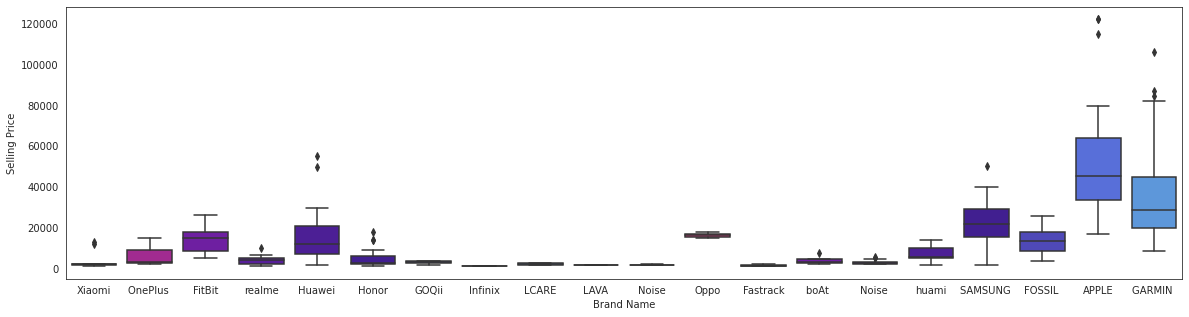

In [23]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand Name", y="Selling Price", data=df,palette=colors)

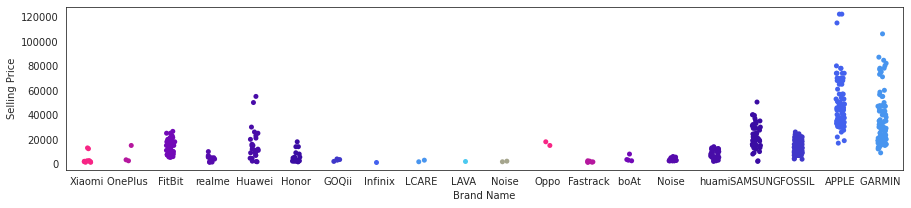

In [24]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Selling Price", x="Brand Name", data=df,palette=colors)

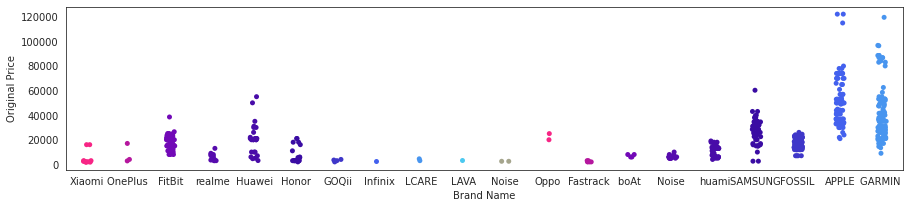

In [25]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Original Price", x="Brand Name", data=df,palette=colors)

# **Inference:**
* Average Price of tracker from Apple is around 50K INR while average price for Garmin trackers is around 35K INR. Fitness Trackers from Samsung are priced at an average of 22K INR. 
* Products from Apple are the most expensive while FitBit seems to offering the maximum number of mid price range products.